In [41]:
import json
  

import pandas as pd
patients_df = pd.read_json('ultimate_data_challenge.json')
patients_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [64]:
patients_df1 = pd.read_json('logins.json')
patients_df1.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [73]:
patients_df1.resample('15min', on='login_time').count()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [74]:
import datetime as dt
def get_month(x): return dt.datetime(x.year, x.month, 1)

patients_df1['Invoicetime'] = patients_df1['login_time'].apply(get_time)
#grouping = patients_df1.groupby('CustomerID')['InvoiceMonth']
#patients_df1['CohortMonth'] = grouping.transform('min')
patients_df1.head()

ValueError: month must be in 1..12

In [9]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

invoice_year, invoice_month, invoice_day = get_date_int(patients_df1, 'login_time')

In [14]:
def get_time_int(df, column):
    hours = df[column].dt.hour
    mins = df[column].dt.minute
    day = df[column].dt.day
    return hours, mins, day

invoice_year, invoice_month, invoice_day = get_time_int(patients_df1, 'login_time')

In [29]:
patients_df1.head()

,login_time,InvoiceMonth,CohortMonth
0,1970-01-01 20:13:18,1970-01-01,1970-01-01
1,1970-01-01 20:16:10,1970-01-01,1970-01-01
2,1970-01-01 20:16:37,1970-01-01,1970-01-01
3,1970-01-01 20:16:36,1970-01-01,1970-01-01
4,1970-01-01 20:26:21,1970-01-01,1970-01-01


In [19]:
grouping = patients_df1.groupby(invoice_year)['InvoiceMonth']
patients_df1['CohortMonth'] = grouping.transform('min')
patients_df1.head()

,login_time,InvoiceMonth,CohortMonth
0,1970-01-01 20:13:18,1970-01-01,1970-01-01
1,1970-01-01 20:16:10,1970-01-01,1970-01-01
2,1970-01-01 20:16:37,1970-01-01,1970-01-01
3,1970-01-01 20:16:36,1970-01-01,1970-01-01
4,1970-01-01 20:26:21,1970-01-01,1970-01-01


In [76]:
patients_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [78]:
patients_df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [79]:
patients_df.groupby(['city']).mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
city,,,,,,,,
Astapor,1.948651,4.630593,1.086522,10.140305,0.391738,60.370050,5.427940,4.798853
King's Landing,2.463672,4.706997,1.070707,9.966979,0.415202,63.232290,5.976596,4.853162
Winterfell,2.431179,4.532996,1.068194,7.449927,0.350146,60.318936,5.980153,4.730909


In [84]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

patients_df['signup_date'] = pd.to_datetime(patients_df['signup_date'], format = '%Y/%m/%d')
patients_df['last_trip_date'] = pd.to_datetime(patients_df['last_trip_date'], format = '%Y/%m/%d')
signup_year, signup_month, signup_day = get_date_int(patients_df, 'signup_date')
last_trip_year, last_trip_month, last_trip_day = get_date_int(patients_df, 'last_trip_date')

In [89]:
 #Calculate difference in years
years_diff =  last_trip_year-signup_year 

# Calculate difference in months
months_diff =  last_trip_month-signup_month 

# Calculate difference in days
days_diff =  last_trip_day-signup_day 

# Extract the difference in days from all previous values
patients_df['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff +1
patients_df.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_trip_date\t,CohortIndex
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-06-17,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-05-05,97
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-01-07,2
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-06-29,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-03-15,49


In [93]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = patients_df.groupby(['signup_date', 'CohortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['avg_rating_of_driver'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='signup_date', columns='CohortIndex', values='avg_rating_of_driver')
print(average_price.round(1))

CohortIndex  1    2    3    4    5    6    7    8    9    10   ...  172  173  \
signup_date                                                    ...             
2014-01-01   4.5  4.7  4.5  4.7  4.6  4.5  4.8  4.5  5.0  4.6  ...  4.5  4.5   
2014-01-02   4.6  4.7  4.6  4.9  4.9  4.4  5.0  4.9  4.6  4.6  ...  4.7  4.4   
2014-01-03   4.7  4.7  4.6  4.8  4.8  4.4  5.0  NaN  4.2  4.8  ...  4.6  4.6   
2014-01-04   4.5  4.5  4.5  4.8  4.8  4.8  4.8  5.0  4.9  4.2  ...  4.6  4.6   
2014-01-05   4.6  4.7  4.6  4.8  4.4  4.4  4.7  4.6  4.6  4.2  ...  4.5  4.6   
2014-01-06   4.4  4.7  4.5  4.6  4.7  4.6  4.8  4.5  4.8  5.0  ...  4.6  4.4   
2014-01-07   4.5  4.7  4.7  4.6  4.4  4.6  4.4  4.5  4.2  4.7  ...  4.6  4.6   
2014-01-08   4.8  4.6  4.5  4.7  4.5  4.7  4.5  5.0  4.3  4.6  ...  4.6  4.7   
2014-01-09   4.7  4.6  4.2  4.8  4.8  4.6  4.4  4.9  5.0  5.0  ...  4.5  4.6   
2014-01-10   4.4  4.6  4.5  4.5  4.7  4.6  4.7  4.8  4.8  4.3  ...  4.7  NaN   
2014-01-11   4.6  4.6  4.8  4.7  5.0  4.

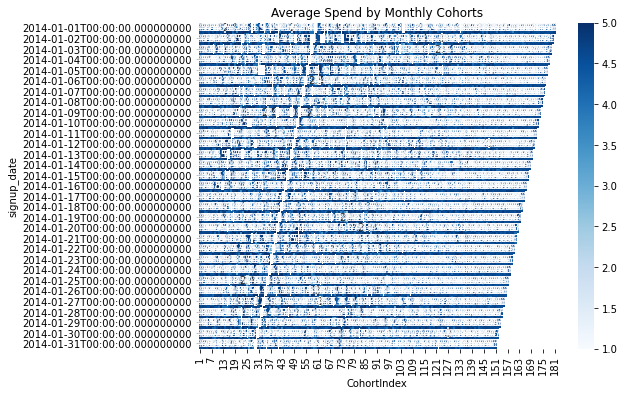

In [96]:
# Import seaborn package as sns
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmapaverage_price
sns.heatmap(average_price, annot=True, cmap='Blues')
plt.show()